18.123331836466956


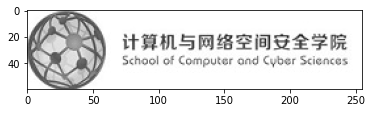

In [64]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(img: np.ndarray, mean: float, variance: float) -> np.ndarray:
    """
    给图片添加高斯噪声

    Args:
        img: 图片矩阵
        mean: 均值
        variance: 方差
    Returns:
        添加了高斯噪声的图片矩阵
    """
    sigma = np.sqrt(variance)
    noise = np.zeros_like(img)
    cv2.randn(noise, mean, sigma)
    return img + noise



def psnr(img1: np.ndarray, img2: np.ndarray) -> float:
    """
    计算两张图片的 PSNR 值

    Args:
        img1: 图片 1
        img2: 图片 2
    Returns:
        PSNR 值
    """
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float("inf")
    return 20 * np.log10(255.0 / np.sqrt(mse))

#def modify(ori_img,w_img,a):
#    cA, (cH, cV, cD) = pywt.dwt2(ori_img, 'haar')   #载体图像dwt变换
#    cH1=zeros(cH.shape)
#    rew_img=w_img.reshape(-1,1)
#    for i in range(cH.shape[0]):
#        for j in range(cH.shape[1]):
#            if i*cH.shape[1]+j>=rew_img.shape[0]:
#                break
#            else:
#                cH1[i][j] = cH[i][j]+a*rew_img[i*cH.shape[1]+j-1]   #嵌入后载体图像的新的低频分量
#    img_with_w= pywt.idwt2((cA, (cH1, cV, cD)), 'haar')
#
#    return img_with_w

def modify(ori_img,w_img,a):
    cA, (cH, cV, cD) = pywt.dwt2(ori_img, 'haar')   #载体图像dwt变换
    #print(w_img.shape)
    #print(cH.shape[0]-w_img.shape[0])
    nw_img=np.pad(w_img,((0,cH.shape[0]-w_img.shape[0]),(0,0)))
    #print(nw_img.shape)
    cH1 = cH+a*nw_img   #嵌入后载体图像的新的低频分量
    img_with_w= pywt.idwt2((cA, (cH1, cV, cD)), 'haar')

    return img_with_w


def extract(ori_img,img_with_w,w_img,a):
    cA1, (cH1, cV1, cD1) = pywt.dwt2(ori_img, 'haar')   #载体图像dwt变换
    cA2, (cH2, cV2, cD2) = pywt.dwt2(img_with_w, 'haar')   #含水印载体图像dwt变换
    ex_w = (cH2-cH1)/a
    res=ex_w[0:w_img.shape[0]-1,0:w_img.shape[1]-1]

    return res

if __name__ == '__main__':
    
    watermark_img_path = "image/gray_logosmall.jpg"
    lena_img_path = "image/lena512.jpg"
    #generated_img_path = "encoding0_5.jpg"
    #decoding_watermark_path = "decoding0_5.jpg"
    #原始图片
    ori_img = cv2.imread(lena_img_path, 0)
    w_img = cv2.imread(watermark_img_path,0)
    
#嵌入水印
    #水印程度
    a = 0.15

    img_with_w = modify(ori_img,w_img,a)
    #print(psnr(img_with_w,ori_img))
    #plt.imshow(img_with_w, cmap="gray")

    #aw_noisy = add_gaussian_noise(img_with_w, mean=30, variance=30)

# 计算 base_img_mat 和 aw_noisy 的 PSNR 值
    print(psnr(ori_img, aw_noisy))

    ex_w = extract(ori_img,img_with_w,w_img,a)
# 显示图片 aw 和 aw_noisy
    plt.imshow(ex_w, cmap="gray")

    
#提取水印
    #ex_w = extract(ori_img,img_with_w,w_img,a)  
    #plt.imshow(ex_w, cmap="gray")
    #wm = Image.fromarray(uint8(ex_w),)
    #wm.save(decoding_watermark_path)


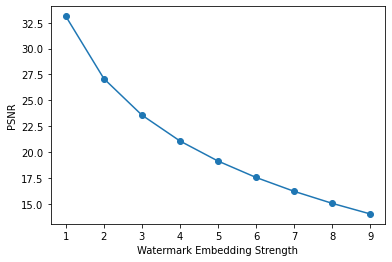

In [53]:
watermark_img_path = "image/gray_logosmall.jpg"
lena_img_path = "image/lena512.jpg"
ori_img = cv2.imread(lena_img_path, 0)
w_img = cv2.imread(watermark_img_path,0)
psnrs=[]
for i in range(1,10):
    img_with_w = modify(ori_img,w_img,i*0.1)
    psnrnum = psnr(img_with_w, ori_img)
    psnrs.append(psnrnum)
    # 绘制折线图
plt.plot(range(1,10), psnrs, marker='o')
plt.xlabel('Watermark Embedding Strength')
plt.ylabel('PSNR')
plt.savefig('chart.jpg')

In [54]:
psnrs

[33.121978435642994,
 27.10137852236337,
 23.579553341249742,
 21.080778609083744,
 19.14257834892262,
 17.558953427970117,
 16.220017635357856,
 15.060178695804122,
 14.037128246856497]

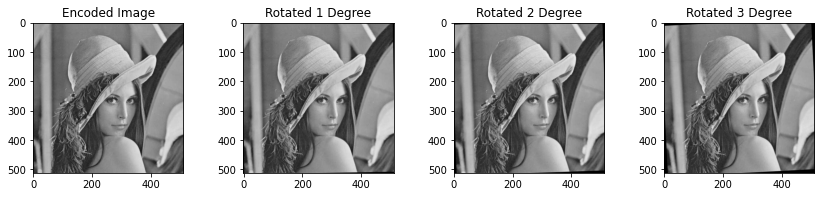

In [62]:
rotation_angle = 3  # 最大旋转度数
aw_rotated_list = []
rows, cols = img_with_w.shape

for i in range(1, rotation_angle + 1):
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), i, 1)
    aw_rotated = cv2.warpAffine(img_with_w, M, (cols, rows))
    aw_rotated_list.append(aw_rotated)

# 显示图片 aw, aw_rotated 和 aw_cropped
fig, axs = plt.subplots(1, 1 + rotation_angle, figsize=(14, 4))
axs[0].imshow(img_with_w, cmap="gray")
axs[0].set_title("Encoded Image")
for i, rotated_img in enumerate(aw_rotated_list):
    axs[i + 1].imshow(rotated_img, cmap="gray")
    axs[i + 1].set_title(f"Rotated {i+1} Degree")

plt.subplots_adjust(wspace=0.4)
plt.show()



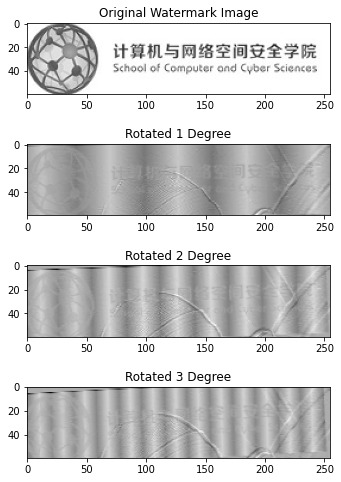

In [66]:
fig, axs = plt.subplots(1 + rotation_angle, 1, figsize=(10, 8))
axs[0].imshow(ex_w, cmap="gray")
axs[0].set_title("Original Watermark Image")

for i, rotated_img in enumerate(aw_rotated_list):
    ex_w = extract(ori_img,rotated_img,w_img,a)
    #decoding_watermark_mat = decoding_watermark(rotated_img, key)
    axs[i + 1].imshow(ex_w, cmap="gray")
    axs[i + 1].set_title(f"Rotated {i+1} Degree")

plt.subplots_adjust(hspace=0.7)
plt.show()

plt.show()